In [ ]:
!git clone https://github.com/krishnaadithya/arda_starter_kit.git
%cd arda_starter_kit
!sudo bash install_requirement.sh

Streaming output truncated to the last 5000 lines.
/opencv/modules/imgproc/test/test_canny.cpp:412:5:   required from here
/opencv/modules/ts/include/opencv2/ts/ts_gtest.h:16732:9: warning: implicitly-declared ‘testing::internal::ValueArray7<std::__cxx11::basic_string<char>, std::__cxx11::basic_string<char>, std::__cxx11::basic_string<char>, std::__cxx11::basic_string<char>, std::__cxx11::basic_string<char>, std::__cxx11::basic_string<char>, std::__cxx11::basic_string<char> >::ValueArray7(const testing::internal::ValueArray7<std::__cxx11::basic_string<char>, std::__cxx11::basic_string<char>, std::__cxx11::basic_string<char>, std::__cxx11::basic_string<char>, std::__cxx11::basic_string<char>, std::__cxx11::basic_string<char>, std::__cxx11::basic_string<char> >&)’ is deprecated []8;;https://gcc.gnu.org/onlinedocs/gcc/Warning-Options.html#index-Wdeprecated-copy-Wdeprecated-copy]8;;]
16732 |       : g1_(g1), g2_(g2), g3_(g3) {}
      |         ^~~~~~~
/opencv/modules/ts/include/opencv2

In [ ]:
!pip install pydicom


  Using cached pydicom-3.0.1-py3-none-any.whl.metadata (9.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 39.1 MB/s eta 0:00:00


In [ ]:
from pydicom import dcmread
import pydicom
from PIL import Image
import numpy as np
import subprocess
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import io

In [ ]:
!chmod +x crop_and_scale_fundus

Preprocessing


In [ ]:


def dicom_to_png(dicom_file_path, output_file_path):
    """
    Convert DICOM file to PNG and save it.
    Handles multiple photometric interpretations including RGB, YBR_FULL, PALETTE_COLOR, and MONOCHROME.

    Args:
        dicom_file_path (str): Path to the DICOM file.
        output_file_path (str): Folder to save the PNG file.
    """
    # Read the DICOM file
    ds = pydicom.dcmread(dicom_file_path)
    pixel_array = None

    # Check if the DICOM file contains pixel data
    if 'PixelData' not in ds:
        raise ValueError(f"DICOM file does not contain pixel data: {dicom_file_path}")


    pixel_array = ds.pixel_array  # This is in YCbCr (YBR) format

    Image.fromarray(pixel_array).save(output_file_path)
    return pixel_array


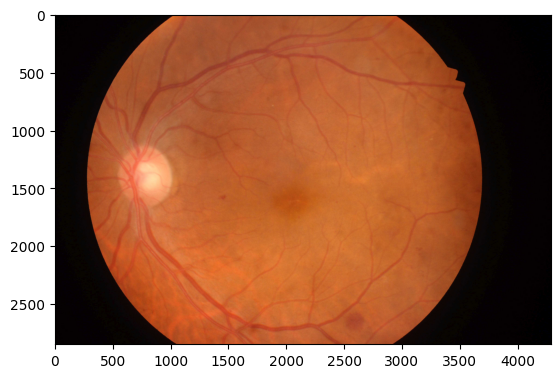

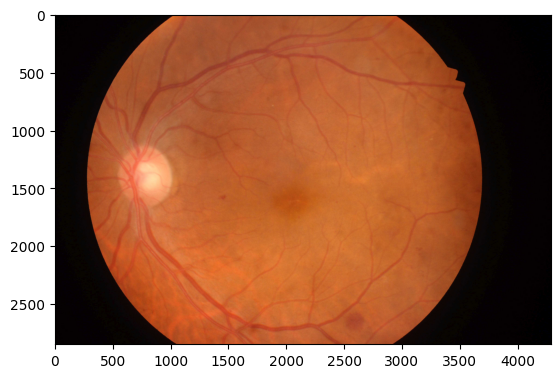

In [ ]:
#to process dicome file:

dicom_file_path = '/content/arda_starter_kit/sample_data/arda-qt1-L.dcm'
output_file_path = '/content/arda_starter_kit/sample_data/arda-qt1-L.png'

image = dicom_to_png(dicom_file_path, output_file_path)

plt.imshow(image)
plt.show()

# to read directly as a image:
image = np.array(Image.open(output_file_path).convert('RGB'))

plt.imshow(image)
plt.show()


(-0.5, 778.5, 778.5, -0.5)

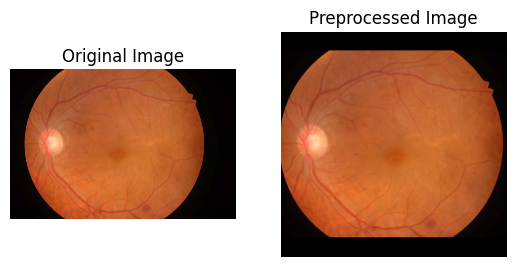

In [ ]:
def crop_and_scale(image_path, save_path):
    cmd = ['/content/arda_starter_kit/crop_and_scale_fundus', image_path, save_path]
    process = subprocess.run(cmd, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)

    # Concate logs
    msg = f'crop_and_scale: {image_path=}, {process.returncode=}, stdout={process.stdout}, stderr={process.stderr}'


    if process.returncode == 0:
        return True, msg
    return False, msg


#crop and scale: the model expects a preprocessed image, which is the same as what they used while training the model.
#it essentiall thresholds the image, gets only the colour part and then pads it to the size that the model expects.
#We already have prebuilt bindary that hangle this, no additional code needed.

image_path = '/content/arda_starter_kit/sample_data/arda-qt1-L.png'
preprocessed_image_path = '/content/arda_starter_kit/sample_data/arda-qt1-L_processed.png'

crop_and_scale(image_path, preprocessed_image_path)


#plot both the original and the preprocessed image:

original_image = np.array(Image.open(image_path).convert('RGB'))
preprocessed_image = np.array(Image.open(preprocessed_image_path).convert('RGB'))

plt.subplot(1, 2, 1)
plt.imshow(original_image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(preprocessed_image)
plt.title('Preprocessed Image')
plt.axis('off')

**Inference**

Model is trained using tensorflow by the google team.

It is 4 - [Inceptionv4](https://arxiv.org/abs/1602.07261) models,ensembled.

In [ ]:
!pip install gdown
!gdown --folder 12nmg3gmVoHAOGohT6tg9XGmEI0bupGcT

Retrieving folder contents
Retrieving folder 1EngbyggUwHzUS0uWIalXPILS_mVwnXwx variables
Processing file 1_dPGdQ9gr-IfiebrTOaHHrHHbXygFw12 variables.data-00000-of-00001
Processing file 1TUTvIC4y7JQQYdSYRySgoMO1jq750jQ4 variables.index
Processing file 1rRUk3N0Z0ymPV8z2Ck3QNhTE34F_mT50 saved_model.pb
Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From (original): https://drive.google.com/uc?id=1_dPGdQ9gr-IfiebrTOaHHrHHbXygFw12
From (redirected): https://drive.google.com/uc?id=1_dPGdQ9gr-IfiebrTOaHHrHHbXygFw12&confirm=t&uuid=5770c824-2194-4a14-9d84-756d8d6b7a03
To: /content/arda_starter_kit/ce_45 DR-DME model/variables/variables.data-00000-of-00001
100% 855M/855M [00:12<00:00, 66.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1TUTvIC4y7JQQYdSYRySgoMO1jq750jQ4
To: /content/arda_starter_kit/ce_45 DR-DME model/variables/variables.index
100% 51.4k/51.4k [00:00<00:00, 114MB/s]
Downloading...
From: https://driv

In [ ]:
#load the model:
model_path = "/content/arda_starter_kit/ce_45 DR-DME model"
model = tf.saved_model.load(model_path)
infer = model.signatures["serving_default"]

In [ ]:
def arda_pred(image, infer):
    # Main prediction function that processes the image and formats the output
    # Takes an image and inference model as input
    # Returns a dictionary with processed prediction outputs
    prediction = predict(image, infer)
    outputs = {key: val.numpy().tolist()[0] if len(val.numpy().tolist()[0])>1 else val.numpy().tolist()[0][0] for key, val in prediction.items()}
    return outputs

def image_to_byte_string(image_array):
    # Converts a numpy image array to a PNG byte string
    # Required format for the model input
    # Returns the image as bytes in PNG format
    img_bytes = io.BytesIO()
    image = Image.fromarray(image_array)
    image.save(img_bytes, format='PNG')
    img_bytes.seek(0)
    return img_bytes.read()

def predict(image_array, infer):
    # Core prediction function that interfaces with the TF model
    # Converts image to required format and runs inference
    # Returns raw model predictions
    image_string = image_to_byte_string(image_array)
    inputs = {'input_image': tf.constant([image_string])}
    result = infer(**inputs)
    return result

def get_result(data):
    # Processes raw model outputs into human-readable results
    # Maps numerical predictions to categorical labels for DME and DR
    # Handles gradability checks and returns formatted results

    # Define possible classification labels
    DME = ['DME_NO', 'DME_YES']
    DR = ['DR_NO', 'DR_MILD', 'DR_MODERATE', 'DR_SEVERE', 'DR_PROLIFERATIVE']

    # Extract relevant predictions from model output
    DME_result = data["OUTPUT_DME_INDEX_SELECTED_VIA_CASCADING_THRESHOLDS"]
    DR_result = data["OUTPUT_DR_GRADE_INDEX_SELECTED_VIA_CASCADING_THRESHOLDS"]
    DME_gradability = data["OUTPUT_DME_GRADABILITY_INDEX_SELECTED_VIA_CASCADING_THRESHOLDS"]
    DR_gradability = data["OUTPUT_DR_GRADABILITY_INDEX_SELECTED_VIA_CASCADING_THRESHOLDS"]

    # Format results into a dictionary
    result = {}
    result['raw_result'] = data
    # Convert numerical predictions to labels, accounting for ungradable cases
    result['DR'] = DR[int(DR_result)] if DR_gradability == 0 else "DR_UNGRADABLE"
    result['DME'] = DME[int(DME_result)] if DME_gradability == 0 else "DME_UNGRADABLE"
    return result

The output should match this
```
{'raw_result': {'OUTPUT_DR_GRADABILITY_INDEX_SELECTED_VIA_CASCADING_THRESHOLDS': 0,
  'OUTPUT_DR_GRADE_INDEX_SELECTED_VIA_CASCADING_THRESHOLDS': 2,
  'OUTPUT_DME_GRADABILITY': [0.9986162185668945, 0.0013836966827511787],
  'OUTPUT_DME': [0.9455206394195557, 0.05447942018508911],
  'OUTPUT_DME_GRADABILITY_INDEX_SELECTED_VIA_CASCADING_THRESHOLDS': 0,
  'OUTPUT_DR_GRADABILITY': [0.9992688298225403, 0.0007311946828849614],
  'OUTPUT_DME_INDEX_SELECTED_VIA_CASCADING_THRESHOLDS': 0,
  'OUTPUT_DR_GRADE': [0.0034490262623876333,
   0.031865205615758896,
   0.9113370776176453,
   0.042901862412691116,
   0.010446828790009022]},
 'DR': 'DR_MODERATE',
 'DME': 'DME_NO'}

 ```

In [ ]:
#make predictions:

#crop and scaled image should be used for prediction.

preprocessed_image = np.array(Image.open(preprocessed_image_path))
prediction = arda_pred(preprocessed_image, infer)

#get the results:

result = get_result(prediction)
print(result)



{'raw_result': {'OUTPUT_DR_GRADABILITY_INDEX_SELECTED_VIA_CASCADING_THRESHOLDS': 0, 'OUTPUT_DR_GRADE_INDEX_SELECTED_VIA_CASCADING_THRESHOLDS': 2, 'OUTPUT_DME_GRADABILITY': [0.9986162185668945, 0.0013836966827511787], 'OUTPUT_DME': [0.9455206394195557, 0.05447942018508911], 'OUTPUT_DME_GRADABILITY_INDEX_SELECTED_VIA_CASCADING_THRESHOLDS': 0, 'OUTPUT_DR_GRADABILITY': [0.9992688298225403, 0.0007311946828849614], 'OUTPUT_DME_INDEX_SELECTED_VIA_CASCADING_THRESHOLDS': 0, 'OUTPUT_DR_GRADE': [0.0034490262623876333, 0.031865205615758896, 0.9113370776176453, 0.042901862412691116, 0.010446828790009022]}, 'DR': 'DR_MODERATE', 'DME': 'DME_NO'}


In [ ]:
result

{'raw_result': {'OUTPUT_DR_GRADABILITY_INDEX_SELECTED_VIA_CASCADING_THRESHOLDS': 0,
  'OUTPUT_DR_GRADE_INDEX_SELECTED_VIA_CASCADING_THRESHOLDS': 2,
  'OUTPUT_DME_GRADABILITY': [0.9986162185668945, 0.0013836966827511787],
  'OUTPUT_DME': [0.9455206394195557, 0.05447942018508911],
  'OUTPUT_DME_GRADABILITY_INDEX_SELECTED_VIA_CASCADING_THRESHOLDS': 0,
  'OUTPUT_DR_GRADABILITY': [0.9992688298225403, 0.0007311946828849614],
  'OUTPUT_DME_INDEX_SELECTED_VIA_CASCADING_THRESHOLDS': 0,
  'OUTPUT_DR_GRADE': [0.0034490262623876333,
   0.031865205615758896,
   0.9113370776176453,
   0.042901862412691116,
   0.010446828790009022]},
 'DR': 'DR_MODERATE',
 'DME': 'DME_NO'}